In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib

In [3]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2_del.pkl')
df = pd.read_pickle(path)
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [4]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern(two_theta_range=(5, 60))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,1.922885e-124,3.662136e-106,2.274709e-89,4.608160e-74,3.044665e-60,6.560875e-48,4.610990e-37,1.056908e-27,...,0.055240,0.027132,0.002927,1.539337e-03,2.148806e-02,3.620248e-02,3.856953e-02,1.656177e-02,2.202758e-02,4.907713e-03
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,3.833496e-120,2.186820e-102,4.377218e-86,3.074328e-71,7.576510e-58,6.551718e-46,1.987962e-35,2.116548e-26,...,0.075043,0.011835,0.001790,1.217813e-02,7.475838e-03,1.704685e-02,4.701839e-02,3.450198e-02,1.086083e-02,1.359166e-02
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,1.823350e-181,9.987603e-155,3.717168e-130,9.399893e-108,1.615078e-87,1.885488e-69,1.495594e-53,8.060532e-40,...,0.163494,0.080262,0.007272,6.399682e-02,4.064487e-02,1.894240e-02,7.618732e-03,1.071942e-04,1.552576e-02,2.140453e-02
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.440969,0.157472,0.006549,2.046720e-06,3.176322e-12,2.433899e-20,9.207932e-31,1.719898e-43,1.586077e-58,7.221494e-76
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,3.685323e-13,1.215938e-08,1.336709e-05,4.896124e-04,5.975271e-04,2.429700e-05,3.291830e-08,1.485977e-12,...,0.053768,0.027731,0.003637,3.828243e-03,2.363149e-02,3.321684e-02,3.445653e-02,1.697082e-02,2.246895e-02,5.644233e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.549141,0.044222,0.000029,9.544416e-11,1.319125e-18,7.630326e-29,1.843154e-41,1.858774e-56,7.825725e-74,1.375478e-93
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,2.157189e-123,3.921250e-105,2.264441e-88,4.154300e-73,2.421224e-59,4.483036e-47,2.636998e-36,4.927738e-27,...,0.054545,0.010417,0.000261,1.452075e-03,2.752624e-02,4.467599e-02,2.812541e-02,1.953147e-02,1.280853e-02,1.011006e-02
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,1.628877e-14,1.055123e-09,2.353980e-06,1.808785e-04,4.786917e-04,4.363244e-05,1.369771e-07,1.481054e-11,...,0.050209,0.004052,0.004118,1.054985e-02,1.464532e-02,3.429327e-02,3.956431e-02,2.234222e-02,1.562678e-02,1.100528e-02
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,7.201326e-175,1.028916e-148,1.004674e-124,6.704224e-103,3.057383e-83,9.528597e-66,2.029486e-50,2.954072e-37,...,0.183943,0.051175,0.015940,2.976455e-02,7.230255e-03,2.571710e-03,5.162826e-03,8.772945e-04,1.603885e-02,3.354018e-02


In [5]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [23]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55
0,1.922885e-124,3.662136e-106,2.274709e-89,4.608160e-74,3.044665e-60,6.560875e-48,4.610990e-37,1.056908e-27,7.901144e-20,1.926430e-13,...,0.055240,0.027132,0.002927,1.539337e-03,2.148806e-02,3.620248e-02,3.856953e-02,1.656177e-02,2.202758e-02,4.907713e-03
1,3.833496e-120,2.186820e-102,4.377218e-86,3.074328e-71,7.576510e-58,6.551718e-46,1.987962e-35,2.116548e-26,7.907060e-19,1.036499e-12,...,0.075043,0.011835,0.001790,1.217813e-02,7.475838e-03,1.704685e-02,4.701839e-02,3.450198e-02,1.086083e-02,1.359166e-02
2,1.823350e-181,9.987603e-155,3.717168e-130,9.399893e-108,1.615078e-87,1.885488e-69,1.495594e-53,8.060532e-40,2.951708e-28,7.344172e-19,...,0.163494,0.080262,0.007272,6.399682e-02,4.064487e-02,1.894240e-02,7.618732e-03,1.071942e-04,1.552576e-02,2.140453e-02
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.549308e-318,...,0.440969,0.157472,0.006549,2.046720e-06,3.176322e-12,2.433899e-20,9.207932e-31,1.719898e-43,1.586077e-58,7.221494e-76
4,3.685323e-13,1.215938e-08,1.336709e-05,4.896124e-04,5.975271e-04,2.429700e-05,3.291830e-08,1.485977e-12,2.396561e-18,3.260115e-13,...,0.053768,0.027731,0.003637,3.828243e-03,2.363149e-02,3.321684e-02,3.445653e-02,1.697082e-02,2.246895e-02,5.644233e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.549141,0.044222,0.000029,9.544416e-11,1.319125e-18,7.630326e-29,1.843154e-41,1.858774e-56,7.825725e-74,1.375478e-93
1721,2.157189e-123,3.921250e-105,2.264441e-88,4.154300e-73,2.421224e-59,4.483036e-47,2.636998e-36,4.927738e-27,2.925403e-19,5.517268e-13,...,0.054545,0.010417,0.000261,1.452075e-03,2.752624e-02,4.467599e-02,2.812541e-02,1.953147e-02,1.280853e-02,1.011006e-02
1722,1.628877e-14,1.055123e-09,2.353980e-06,1.808785e-04,4.786917e-04,4.363244e-05,1.369771e-07,1.481054e-11,5.698369e-17,2.015100e-12,...,0.050209,0.004052,0.004118,1.054985e-02,1.464532e-02,3.429327e-02,3.956431e-02,2.234222e-02,1.562678e-02,1.100528e-02
1723,7.201326e-175,1.028916e-148,1.004674e-124,6.704224e-103,3.057383e-83,9.528597e-66,2.029486e-50,2.954072e-37,2.938557e-26,1.997676e-17,...,0.183943,0.051175,0.015940,2.976455e-02,7.230255e-03,2.571710e-03,5.162826e-03,8.772945e-04,1.603885e-02,3.354018e-02


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [8]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

<IPython.core.display.Javascript object>


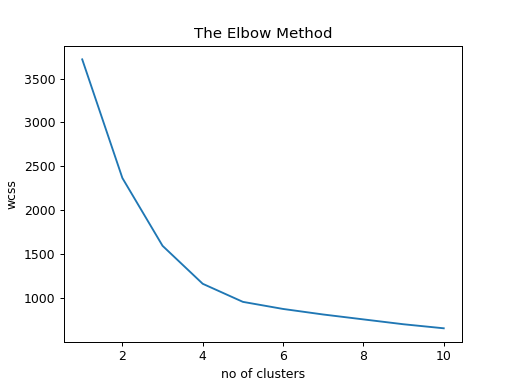

In [9]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
model = NMF(n_components=4, init='random', random_state=0, max_iter = 2000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

In [25]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition


,0,1,2,3
0,0.006839,0.308016,0.000000,0.015134
1,0.020891,0.000000,0.003338,0.374714
2,0.104247,0.000000,0.105978,0.000000
3,0.259395,0.000000,0.000000,0.017056
4,0.007426,0.302650,0.000000,0.020287
...,...,...,...,...
1720,0.271490,0.000942,0.004022,0.045592
1721,0.004342,0.301275,0.007360,0.000000
1722,0.000681,0.035124,0.013864,0.342515
1723,0.095568,0.002612,0.112113,0.079992


In [26]:
W_df.describe()

,0,1,2,3
count,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.072007,0.090052,0.041267,0.088567
std,0.079961,0.129965,0.048130,0.138887
min,0.000000,0.000000,0.000000,0.000000
25%,0.007188,0.000000,0.000559,0.000559
50%,0.044010,0.006381,0.011291,0.016111
75%,0.102434,0.283649,0.089621,0.077636
max,0.289448,0.325011,0.146484,0.401543


In [27]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [28]:
from sklearn import metrics
metrics.silhouette_score(X, nmf_labels, metric='l1')

0.5796336652988142

In [29]:
nmf_labels

array([0, 2, 1, ..., 2, 1, 3])

In [30]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
W_df.columns = ['x1','x2','x3','x4','cluster', 'labels']
W_df.head(40)

,x1,x2,x3,x4,cluster,labels
0,0.006839,0.308016,0.000000,0.015134,0,m
1,0.020891,0.000000,0.003338,0.374714,2,o
2,0.104247,0.000000,0.105978,0.000000,1,p-o
3,0.259395,0.000000,0.000000,0.017056,3,t
4,0.007426,0.302650,0.000000,0.020287,0,m
5,0.099728,0.000000,0.110027,0.000000,1,p-o
6,0.126227,0.017775,0.041406,0.081803,4,unknown
7,0.008410,0.309280,0.000000,0.010124,0,m
8,0.020720,0.000000,0.004876,0.369895,2,o
9,0.099127,0.000000,0.109322,0.000000,1,p-o


In [31]:
# look at the above table
W_df = W_df.replace({'m': 0, 'p-o': 1, 'o': 2, 't': 3, 'unknown': 4})

In [32]:
W_df


,x1,x2,x3,x4,cluster,labels
0,0.006839,0.308016,0.000000,0.015134,0,0
1,0.020891,0.000000,0.003338,0.374714,2,2
2,0.104247,0.000000,0.105978,0.000000,1,1
3,0.259395,0.000000,0.000000,0.017056,3,3
4,0.007426,0.302650,0.000000,0.020287,0,0
...,...,...,...,...,...,...
1720,0.271490,0.000942,0.004022,0.045592,3,3
1721,0.004342,0.301275,0.007360,0.000000,0,0
1722,0.000681,0.035124,0.013864,0.342515,2,2
1723,0.095568,0.002612,0.112113,0.079992,1,4


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(W_df['labels'], W_df['cluster'])

0.9263768115942029

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(W_df['labels'], W_df['cluster'])

array([[460,   0,   0,   0,   0],
       [  0, 384,   0,   0,  20],
       [  0,   0, 345,   0,   0],
       [  0,   3,   0, 207,  35],
       [  0,  32,   0,  37, 202]], dtype=int64)

In [ ]:
dfPCA2 = W_df[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Predicted Clusters", fontsize=10)

In [ ]:
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Ground Truth", fontsize=10)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [ ]:
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()